# **Bank Churn - Exploratory Data Analysis**
Author: André Paiva (Xornotor)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')

In [2]:
df_train = pd.read_csv('data/train.csv', index_col='id')
with pd.option_context('mode.chained_assignment', None):
    df_train['Geography'] = df_train['Geography'].astype('category')
    df_train['Gender'] = df_train['Gender'].astype('category')
    df_train['Age'] = df_train['Age'].astype('int')
    df_train['HasCrCard'] = df_train['HasCrCard'].astype('bool')
    df_train['IsActiveMember'] = df_train['IsActiveMember'].astype('bool')
    df_train['Exited'] = df_train['Exited'].astype('bool')
df_train.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,True,False,181449.97,False
1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,True,True,49503.50,False
2,15694510,Hsueh,678,France,Male,40,10,0.00,2,True,False,184866.69,False
3,15741417,Kao,581,France,Male,34,2,148882.54,1,True,True,84560.88,False
4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,True,True,15068.83,False
5,15771669,Genovese,588,Germany,Male,36,4,131778.58,1,True,False,136024.31,True
6,15692819,Ch'ang,593,France,Female,30,8,144772.69,1,True,False,29792.11,False
7,15669611,Chukwuebuka,678,Spain,Male,37,1,138476.41,1,True,False,106851.60,False
8,15691707,Manna,676,France,Male,43,4,0.00,2,True,False,142917.13,False


In [3]:
df_train_filtered = df_train[['CreditScore', 'Geography', 'Gender',
                              'Age', 'Tenure', 'Balance',
                              'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                              'EstimatedSalary', 'Exited']]
df_train_filtered = pd.get_dummies(df_train_filtered)
df_train_filtered.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,,,
0,668,33,3,0.00,2,True,False,181449.97,False,True,False,False,False,True
1,627,33,1,0.00,2,True,True,49503.50,False,True,False,False,False,True
2,678,40,10,0.00,2,True,False,184866.69,False,True,False,False,False,True
3,581,34,2,148882.54,1,True,True,84560.88,False,True,False,False,False,True
4,716,33,5,0.00,2,True,True,15068.83,False,False,False,True,False,True
5,588,36,4,131778.58,1,True,False,136024.31,True,False,True,False,False,True
6,593,30,8,144772.69,1,True,False,29792.11,False,True,False,False,True,False
7,678,37,1,138476.41,1,True,False,106851.60,False,False,False,True,False,True
8,676,43,4,0.00,2,True,False,142917.13,False,True,False,False,False,True


/tmp/ipykernel_8417/4045878981.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


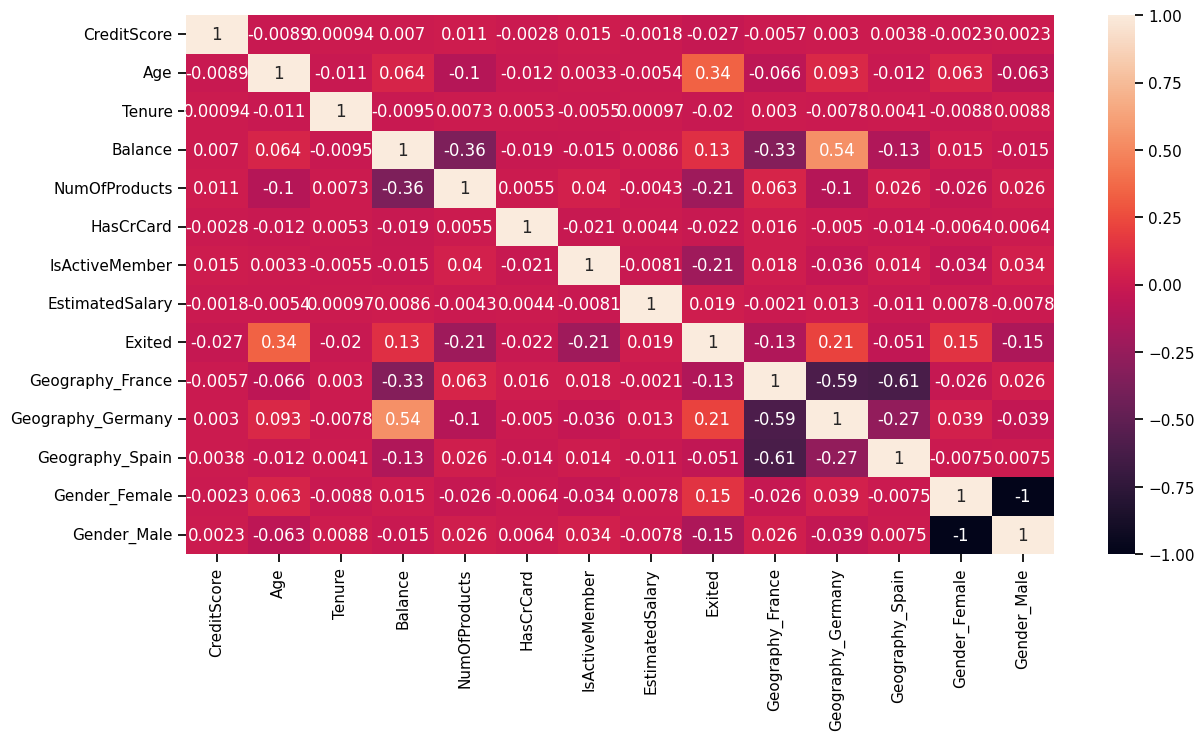

In [4]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(df_train_filtered.corr(), ax=ax,
            annot=True, vmin=-1, vmax=1)
fig.show()

**Feature Engineering:** Pick variables with stronger correlation with "Exited"
* Age
* Balance
* NumOfProducts
* IsActiveMember
* Geography
* Gender

/tmp/ipykernel_8417/1294453841.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


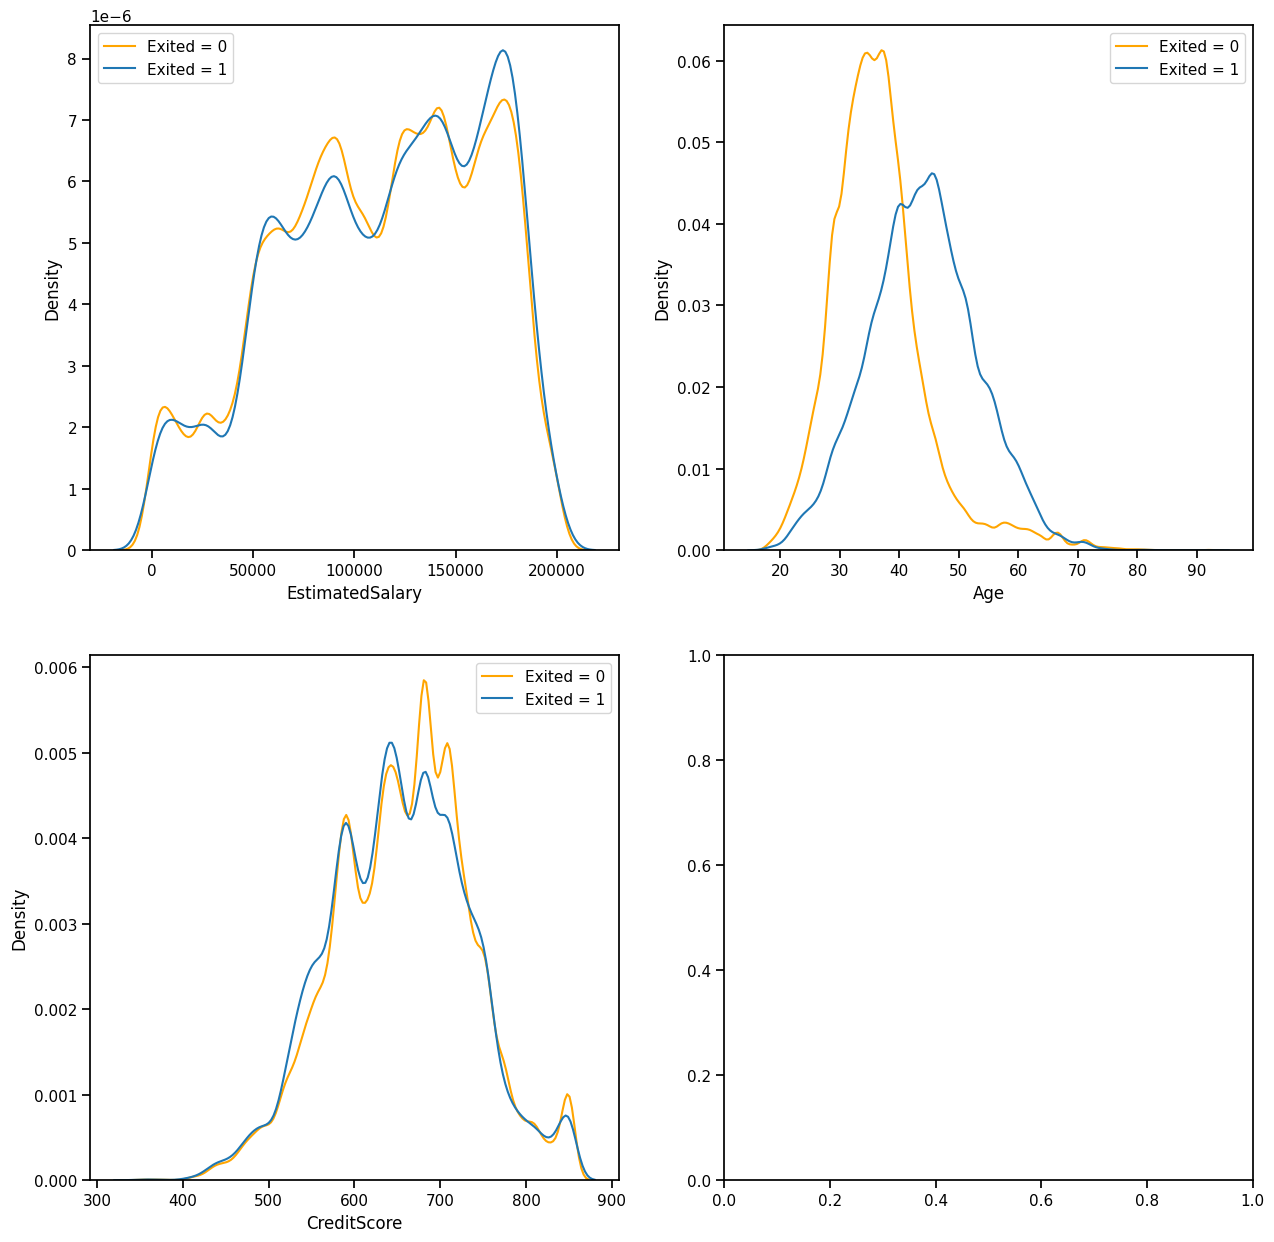

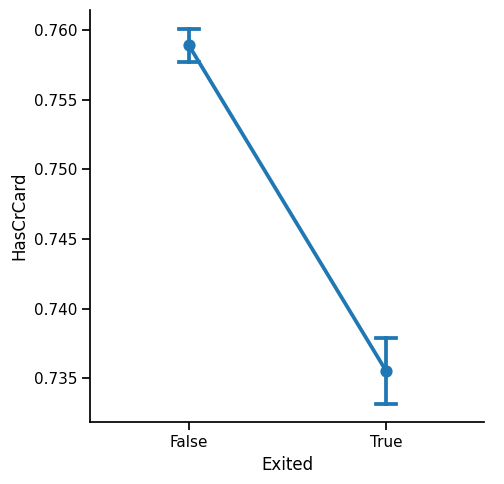

In [47]:
not_exited = df_train_filtered[df_train_filtered['Exited'] == 0]
exited = df_train_filtered[df_train_filtered['Exited'] == 1]

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.kdeplot(data=not_exited, x='EstimatedSalary', color='orange', label='Exited = 0', ax=ax[0][0])
sns.kdeplot(data=exited, x='EstimatedSalary', label='Exited = 1', ax=ax[0][0])
ax[0][0].legend()

sns.kdeplot(data=not_exited, x='Age', color='orange', label='Exited = 0', ax=ax[0][1])
sns.kdeplot(data=exited, x='Age', label='Exited = 1', ax=ax[0][1])
ax[0][1].legend()

sns.kdeplot(data=not_exited, x='CreditScore', color='orange', label='Exited = 0', ax=ax[1][0])
sns.kdeplot(data=exited, x='CreditScore', label='Exited = 1', ax=ax[1][0])
ax[1][0].legend()



sns.catplot(data=df_train, x='Exited', y='HasCrCard',
            kind='point', errorbar='se', capsize=.1)

fig.show()